In [12]:
import numpy as np
import pandas as pd
import math
from itertools import combinations
import matplotlib.pyplot as plt
from rectangle import Rectangle
from sklearn.linear_model import LinearRegression
import utility

In [24]:
df = pd.read_csv("Data/Data3Dnoised1000.csv", index_col=0)
X = df.iloc[:,0:20].values
y = df[["r1", "r2", "r3"]].values

In [25]:
X_train, X_test, X_cal, y_train, y_test, y_cal = utility.calibration_split(X, y)
# Fit model to training
model = LinearRegression()
model.fit(X_train, y_train)
print(model.score(X_train, y_train))

0.9736419998100011


In [15]:
# Vectorized calibration scores
prediction = model.predict(X_cal)
scores = np.abs(prediction - y_cal)
scores_T = np.transpose(scores)

# Test scores
prediction_test = model.predict(X_test)
scores_test = np.abs(prediction_test - y_test)

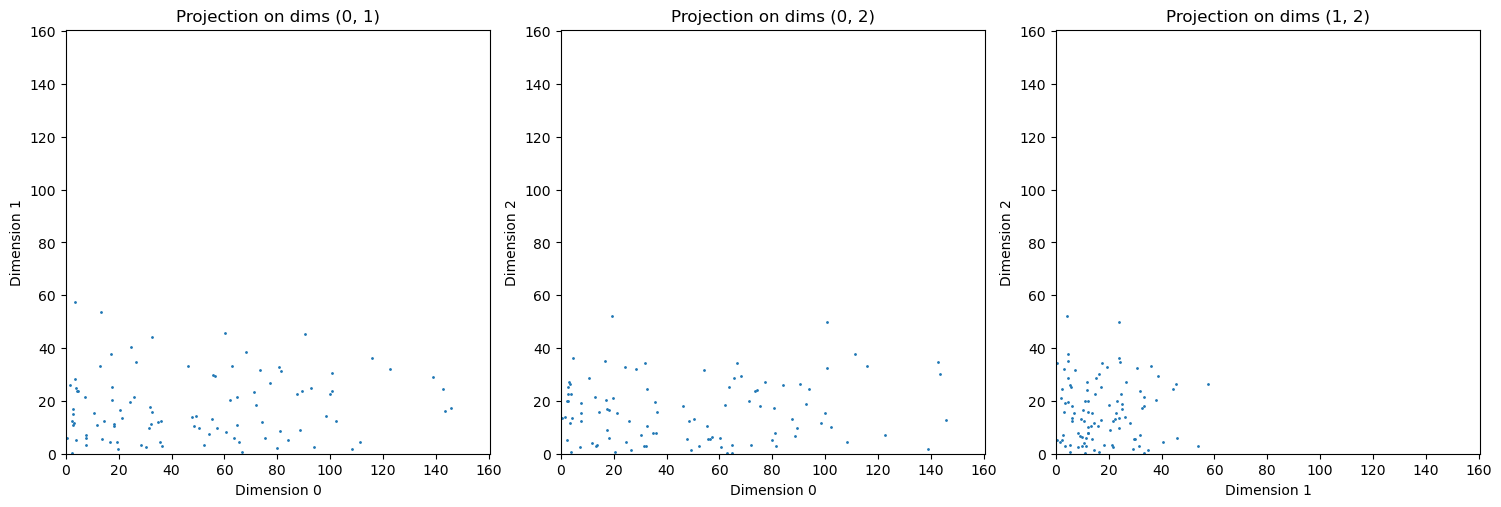

(<Figure size 1500x500 with 3 Axes>,
 array([<Axes: title={'center': 'Projection on dims (0, 1)'}, xlabel='Dimension 0', ylabel='Dimension 1'>,
        <Axes: title={'center': 'Projection on dims (0, 2)'}, xlabel='Dimension 0', ylabel='Dimension 2'>,
        <Axes: title={'center': 'Projection on dims (1, 2)'}, xlabel='Dimension 1', ylabel='Dimension 2'>],
       dtype=object))

In [16]:
utility.make_score_plot(scores)

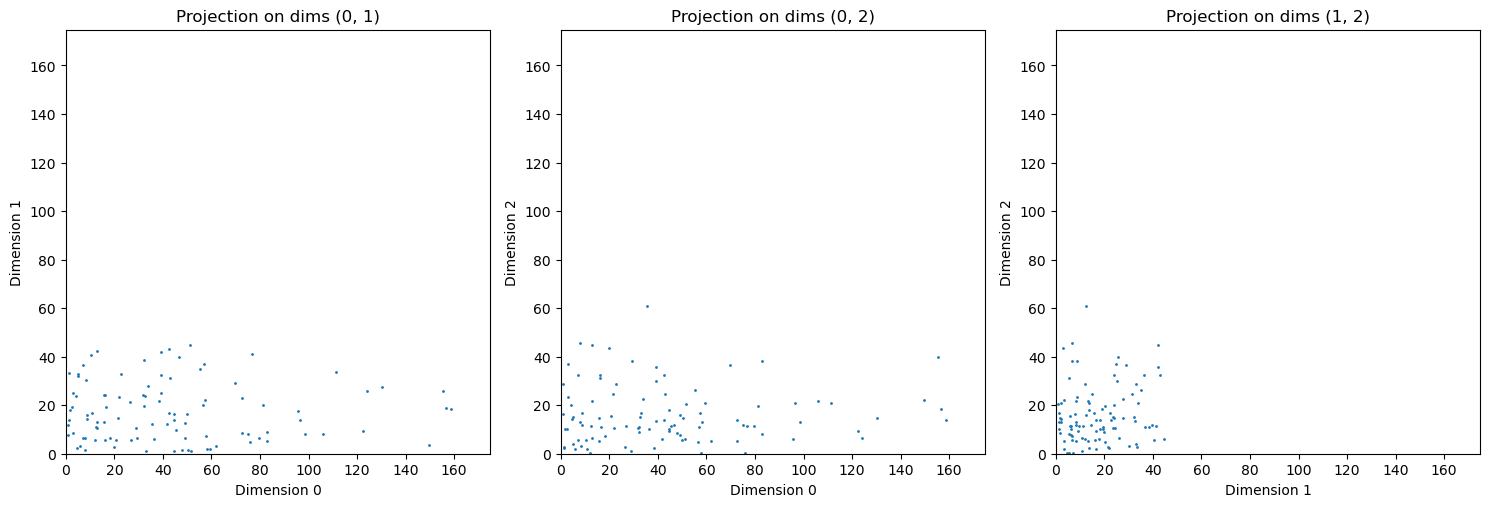

(<Figure size 1500x500 with 3 Axes>,
 array([<Axes: title={'center': 'Projection on dims (0, 1)'}, xlabel='Dimension 0', ylabel='Dimension 1'>,
        <Axes: title={'center': 'Projection on dims (0, 2)'}, xlabel='Dimension 0', ylabel='Dimension 2'>,
        <Axes: title={'center': 'Projection on dims (1, 2)'}, xlabel='Dimension 1', ylabel='Dimension 2'>],
       dtype=object))

In [17]:
utility.make_score_plot(scores_test)

In [18]:
rectangles = utility.rectangle_norm_region(scores)
regions = utility.configure_prediction_norm(scores, rectangles, 0.1)

In [ ]:
def make_scoreRegion_plot_norm(scores, regions, dimx = None, dimy = None):
    
    n = regions[1][1].dimensions()
    global_min = 0
    global_max = n = np.max(scores)*1.1

    # Helper function to draw a 2D projection for a pair of dims
    def draw_region(ax,rectangles, dx, dy):

        if rectangles[1] == 0:
            x_min, x_max = rectangles[0].lower[dx],  rectangles[0].upper[dx]
            y_min, y_max =  rectangles[0].lower[dy],  rectangles[0].upper[dy]
            x_coords = [x_min, x_max, x_max, x_min, x_min]
            y_coords = [y_min, y_min, y_max, y_max, y_min]
        else:
            x1_min, x1_max = rectangles[0].lower[dx],  rectangles[0].upper[dx]
            y1_min, y1_max =  rectangles[0].lower[dy],  rectangles[0].upper[dy]

            x2_min, x2_max = rectangles[1].lower[dx],  rectangles[1].upper[dx]
            y2_min, y2_max =  rectangles[1].lower[dy],  rectangles[1].upper[dy]

            x_coords = [x2_min, x2_max, x2_max, x1_max, x1_max, x1_min, x2_min]
            y_coords = [y2_max, y2_max, y2_min, y2_min, y1_max, y1_max, y2_max]

        # Outline the rectangle
        
        ax.plot(x_coords, y_coords, 'b-', alpha = 0.1)
        ax.fill(x_coords, y_coords, color='blue', alpha=0.1)

        # Make axes the same size for easy comparison
        ax.set_xlim(global_min, global_max)
        ax.set_ylim(global_min, global_max)

        ax.set_aspect('equal', adjustable='box')
        ax.set_xlabel(f"Dimension {dx}")
        ax.set_ylabel(f"Dimension {dy}")
        ax.set_title(f"Projection on dims ({dx}, {dy})")


In [ ]:
def is_in_rectangle(point, rectangle):
    '''Check whether a point is contained in a given rectangle'''
    return

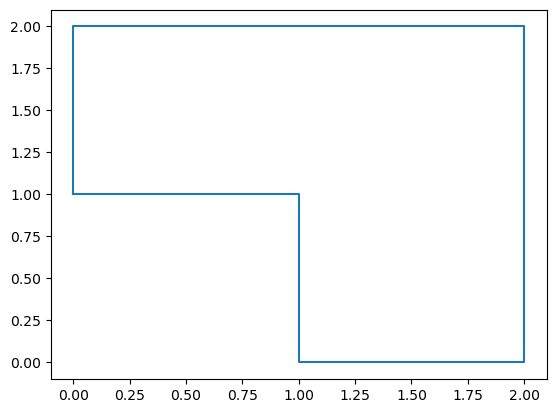

In [30]:
plt.plot([0, 1, 1, 2, 2, 0, 0], [1, 1, 0, 0, 2, 2, 1])


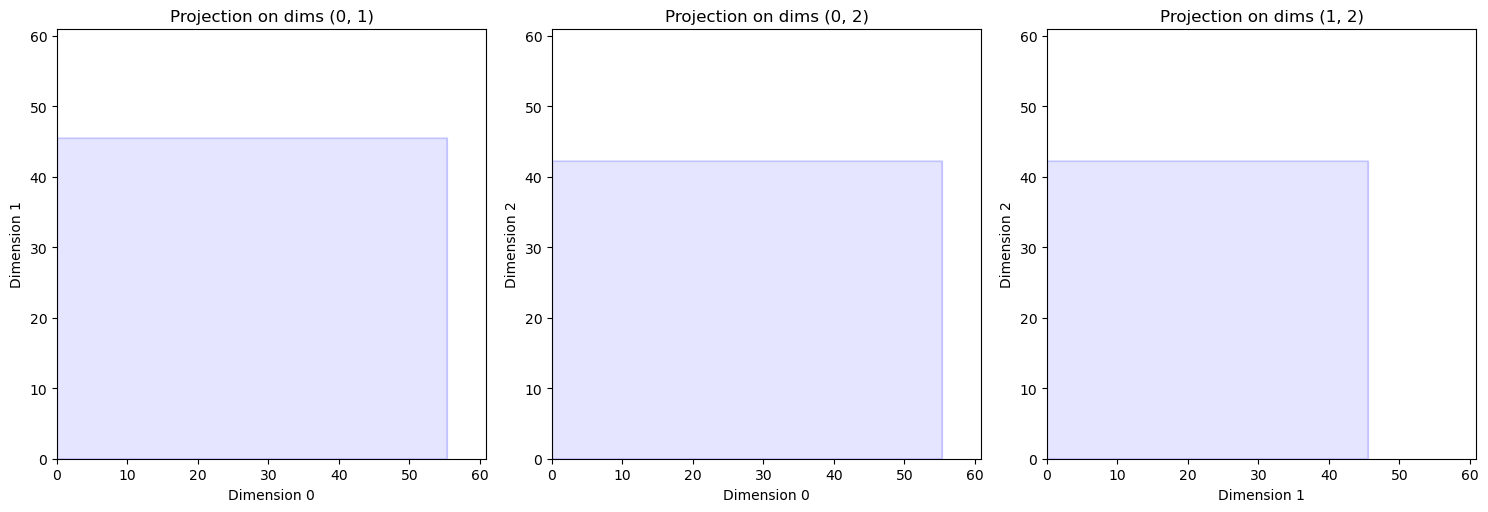

(<Figure size 1500x500 with 3 Axes>,
 array([<Axes: title={'center': 'Projection on dims (0, 1)'}, xlabel='Dimension 0', ylabel='Dimension 1'>,
        <Axes: title={'center': 'Projection on dims (0, 2)'}, xlabel='Dimension 0', ylabel='Dimension 2'>,
        <Axes: title={'center': 'Projection on dims (1, 2)'}, xlabel='Dimension 1', ylabel='Dimension 2'>],
       dtype=object))

In [21]:
regions[55][0].plot()